In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns',None)

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel('Online Retail.xlsx', sheet_name="Online Retail")

df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df = df[df['Quantity']>0]
df = df[df['CustomerID'].notnull()]

print("Date Range: %s - %s" % (df["InvoiceDate"].min(), df['InvoiceDate'].max()))

df = df[df['InvoiceDate'] <'2011-12-01']

df['Sales'] = df['Quantity'] * df['UnitPrice']

Date Range: 2010-12-01 08:26:00 - 2011-12-09 12:50:00


In [5]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'Sales': sum,
            'InvoiceDate': max
        })

In [6]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales': sum,
    'InvoiceDate': max
})

In [7]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

In [8]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [30]:
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000   1.0   
18281.0        80.82     80.82     80.82     80.820000   1.0   
18282.0       100.21    100.21    100.21    100.210000   1.0   
18283.0         1.95    313.65   1886.88    125.792000  15.0   
18287.0        70.68   1001.32   1837.28    612.426667   3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4298 rows x 9 columns]

In [36]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

summary_df = summary_df[summary_df['invoicedate_purchase_duration']>0]



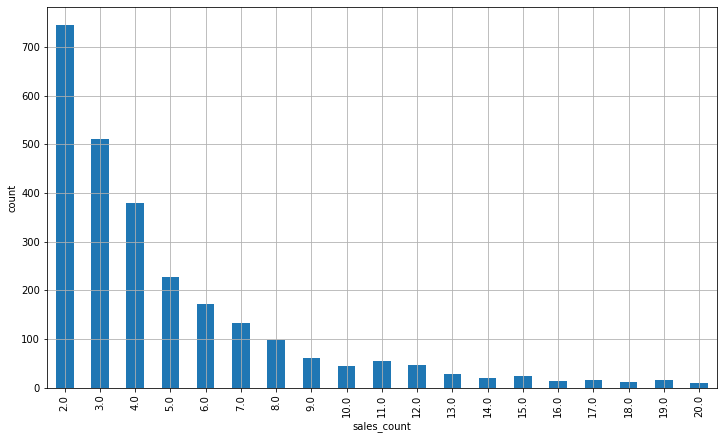

In [41]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
kind='bar', figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

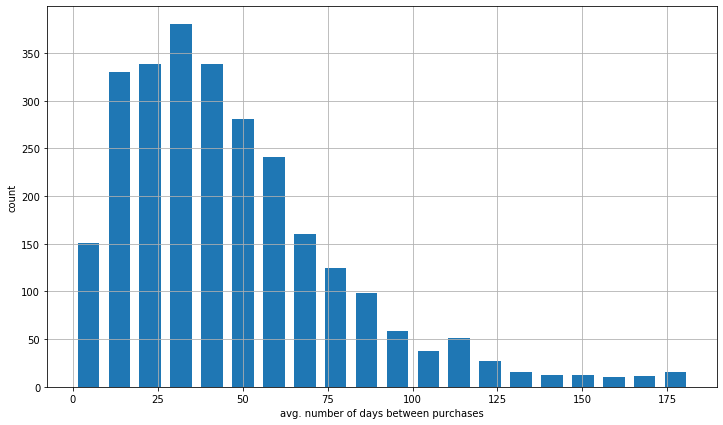

In [42]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

In [9]:
clv_time = '3M'

In [10]:
orders_df.reset_index().groupby(['CustomerID',
                                pd.Grouper(key='InvoiceDate',
                                           freq = clv_time)])

In [11]:
data_df = orders_df.reset_index().groupby(['CustomerID',
                                 pd.Grouper(key='InvoiceDate',freq=clv_time)]).agg({
    'Sales': [sum, groupby_mean, groupby_count]
})

data_df

Sales                    
                             sum           avg count
CustomerID InvoiceDate                              
12346.0    2011-03-31   77183.60  77183.600000   1.0
12347.0    2010-12-31     711.79    711.790000   1.0
           2011-03-31     475.39    475.390000   1.0
           2011-06-30    1018.77    509.385000   2.0
           2011-09-30     584.91    584.910000   1.0
...                          ...           ...   ...
18283.0    2011-06-30     524.68    131.170000   4.0
           2011-09-30     278.09     92.696667   3.0
           2011-12-31     766.21    153.242000   5.0
18287.0    2011-06-30     765.28    765.280000   1.0
           2011-12-31    1072.00    536.000000   2.0

[9220 rows x 3 columns]

In [12]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [13]:
data_df = data_df.reset_index()

In [14]:
data_df

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600000,1.0
1,12347.0,2010-12-31,711.79,711.790000,1.0
2,12347.0,2011-03-31,475.39,475.390000,1.0
3,12347.0,2011-06-30,1018.77,509.385000,2.0
4,12347.0,2011-09-30,584.91,584.910000,1.0
...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4.0
9216,18283.0,2011-09-30,278.09,92.696667,3.0
9217,18283.0,2011-12-31,766.21,153.242000,5.0
9218,18287.0,2011-06-30,765.28,765.280000,1.0


In [15]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i,x in enumerate(
    sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))
}

In [16]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [17]:
data_df

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600000,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790000,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390000,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385000,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910000,1.0,M_2
...,...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4.0,M_3
9216,18283.0,2011-09-30,278.09,92.696667,3.0,M_2
9217,18283.0,2011-12-31,766.21,153.242000,5.0,M_1
9218,18287.0,2011-06-30,765.28,765.280000,1.0,M_3


In [18]:
features_df = pd.pivot_table(data_df[data_df['M']!='M_1'], values=['sales_sum', 'sales_avg', 'sales_count'],columns = 'M', index = 'CustomerID')
features_df = features_df.fillna(0)
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [19]:
features_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00
18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00
18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00


In [20]:
target_df = data_df[data_df['M'] == 'M_1'][['CustomerID','sales_sum']]
#target_df.columns = ['CustomerID','CLV_3M']

In [21]:
target_df = target_df.set_index('CustomerID')
target_df

,sales_sum
CustomerID,
12347.0,1294.32
12349.0,1757.55
12352.0,311.73
12356.0,58.35
12357.0,6207.67
...,...
18274.0,175.92
18276.0,335.86
18277.0,110.38


In [22]:
mldata = features_df.join(target_df,how='left')
mldata = mldata.fillna(0)

mldata = mldata.rename(columns={'sales_sum':'CLV_3M'})

In [23]:
mldata['CLV_3M'].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
Y = mldata['CLV_3M']
X = mldata.drop(columns=['CLV_3M'])

In [26]:
X

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00
18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00
18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00


In [31]:
import numpy as np
np.array(X.iloc[0])

array([0.00000e+00, 0.00000e+00, 7.71836e+04, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       7.71836e+04, 0.00000e+00])

In [35]:
X.iloc[:2]

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.60,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.39,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79


In [42]:
Y.iloc[:10]

CustomerID
12346.0       0.00
12347.0    1294.32
12348.0       0.00
12350.0       0.00
12352.0     311.73
12353.0       0.00
12354.0       0.00
12355.0       0.00
12356.0      58.35
12358.0       0.00
Name: CLV_3M, dtype: float64

In [84]:
np.int?

str.strip(x, chars = '[')

TypeError: strip() takes no keyword arguments

In [98]:
Y.iloc[4]

311.73

In [99]:
X.iloc[4]

sales_avg_M_2       316.250
sales_avg_M_3         0.000
sales_avg_M_4       312.362
sales_avg_M_5         0.000
sales_count_M_2       2.000
sales_count_M_3       0.000
sales_count_M_4       5.000
sales_count_M_5       0.000
sales_sum_M_2       632.500
sales_sum_M_3         0.000
sales_sum_M_4      1561.810
sales_sum_M_5         0.000
Name: 12352.0, dtype: float64

In [100]:
line = str(X.iloc[4].values)
#list(map(float,x.rstrip().split()))
#x = str(request_json['input'])
#a = list(map(int, x.rstrip().split()))
#a
line = line.replace("[", "")
line = line.replace("]", "")
line = np.array(list(map(np.float, line.rstrip().split())))
line

array([ 316.25 ,    0.   ,  312.362,    0.   ,    2.   ,    0.   ,
          5.   ,    0.   ,  632.5  ,    0.   , 1561.81 ,    0.   ])

In [101]:
linear_regression.predict(line.reshape(1,-1))

array([323.79170699])

In [191]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [183]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [32]:
linear_regression = LinearRegression()
linear_regression.fit(X, Y)

print(linear_regression.intercept_)

coef = pd.DataFrame(list(zip(X,linear_regression.coef_)))
coef.columns = ['feature', 'coef']
coef

59.3661646142599


,feature,coef
0,sales_avg_M_2,0.271302
1,sales_avg_M_3,-0.443007
2,sales_avg_M_4,-0.163876
3,sales_avg_M_5,-0.462840
4,sales_count_M_2,77.377444
5,sales_count_M_3,6.730443
6,sales_count_M_4,-76.728462
7,sales_count_M_5,-50.580895
8,sales_sum_M_2,0.231631
9,sales_sum_M_3,0.363190


In [193]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

In [194]:
train_pred = linear_regression.predict(x_train)
test_pred = linear_regression.predict(x_test)

In [198]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_pred))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_pred))


print('In-Sample MAE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_pred))
print('Out-of-Sample MAE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_pred))


print('In-Sample MSE: %0.4f' % mean_squared_error(y_true=y_train, y_pred=train_pred))
print('Out-of-Sample MSE: %0.4f' % mean_squared_error(y_true=y_test, y_pred=test_pred))

In-Sample R-Squared: 0.6539
Out-of-Sample R-Squared: 0.7473
In-Sample MAE: 198.3921
Out-of-Sample MAE: 187.2049
In-Sample MSE: 1586317.7940
Out-of-Sample MSE: 2033639.0441


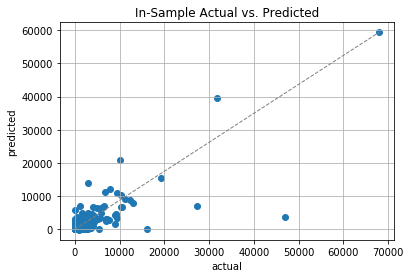

In [201]:
plt.scatter(y_train, train_pred)
plt.plot([0, max(y_train)], [0, max(train_pred)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()

plt.show()

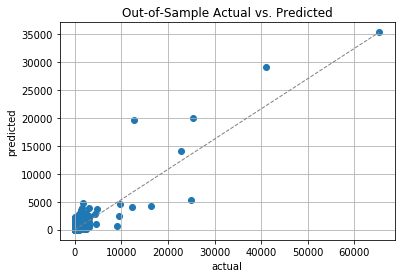

In [202]:
plt.scatter(y_test, test_pred)
plt.plot([0, max(y_test)], [0, max(test_pred)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

In [24]:
!python --version

Python 3.7.4


In [27]:
!python

Python 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)] :: Anaconda, Inc. on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 
KeyboardInterrupt
>>> 
>>> 